# Build SVM Classifier Models

## Import Processed Data

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# set path of the processed data
processed_data_path = Path.cwd().parent / 'data' / 'processed'
train_processed_file_path = processed_data_path /'train_processed.csv'
test_processed_file_path = processed_data_path / 'test_processed.csv'
unlabeled_processed_file_path = processed_data_path / 'unlabeled_processed.csv'

# create data frames for train, test, and unlabled data
train_df = pd.read_csv(train_processed_file_path, index_col = 'PassengerId')
test_df = pd.read_csv(test_processed_file_path, index_col = 'PassengerId')
unlabeled_df = pd.read_csv(unlabeled_processed_file_path, index_col = 'PassengerId')

In [3]:
# in the train and test data, X contains all the columns except Survived
# y is Survived
X_train = train_df.drop(['Survived'], axis = 1)
y_train = train_df['Survived']
X_test = test_df.drop(['Survived'], axis = 1)
y_test = test_df['Survived']

## Default Linear SVM Classifier

In [4]:
from sklearn.svm import LinearSVC

In [5]:
# use 5-fold CV to evaluate accuracy with pca data
model = LinearSVC(random_state = 42)
scores = cross_val_score(model, X_train, y_train, cv = 5)

print('CV accuracty mean: ' + '{0:2f}'.format(scores.mean()))
print('CV accuracty std: ' + '{0:2f}'.format(scores.std()))
print('CV scores:', scores)

CV accuracty mean: 0.806132
CV accuracty std: 0.016964
CV scores: [0.7972028  0.8041958  0.82517483 0.82394366 0.78014184]


## Tuned Linear SVM Classifier

In [6]:
# define the parameter values that will be considered
C_vals = [2**i for i in range(-5,5)]
params = {'C' : C_vals}
# used to evaluate all possible combinations with 5-fold cross-validation
grid_search = GridSearchCV(LinearSVC(random_state = 42),
                           param_grid = params,
                           cv = 5,
                           refit = True,
                           return_train_score = True)

# fit
grid_search.fit(X_train, y_train)

# return the optimal combo of parameters and its score
print(grid_search.best_params_, '\n')
print(grid_search.best_score_)

{'C': 0.125} 

0.8075842696629213


In [7]:
# use 5-fold CV to evaluate accuracy with pca data
model = LinearSVC(random_state = 42,
                  C = 0.125)
scores = cross_val_score(model, X_train, y_train, cv = 5)

print('CV accuracty mean: ' + '{0:2f}'.format(scores.mean()))
print('CV accuracty std: ' + '{0:2f}'.format(scores.std()))
print('CV scores:', scores)

CV accuracty mean: 0.807530
CV accuracty std: 0.021592
CV scores: [0.8041958  0.79020979 0.83916084 0.82394366 0.78014184]


## Default RBF Kernel SVM Classifier

In [8]:
from sklearn.svm import SVC

In [9]:
# use 5-fold CV to evaluate accuracy with train data
model = SVC(random_state = 42,
            kernel = 'rbf',
            probability = True)
scores = cross_val_score(model, X_train, y_train, cv = 5)

print('CV accuracty mean: ' + '{0:2f}'.format(scores.mean()))
print('CV accuracty std: ' + '{0:2f}'.format(scores.std()))
print('CV scores:', scores)

CV accuracty mean: 0.792146
CV accuracty std: 0.019950
CV scores: [0.78321678 0.76223776 0.81818182 0.80985915 0.78723404]


## Tuned RBF Kernel SVM Classifier

In [10]:
# define the parameter values that will be considered
C_vals = [2**i for i in range(-5,5)]
gammas = [2**i for i in range(-5,5)]
params = {'C' : C_vals,
          'gamma' : gammas}

# used to evaluate all possible combinations with 5-fold cross-validation
grid_search = GridSearchCV(SVC(random_state = 42,
                               kernel = 'rbf',
                               probability = True),
                           param_grid = params,
                           cv = 5,
                           refit = True,
                           return_train_score = True)

# fit
grid_search.fit(X_train, y_train)

# return the optimal combo of parameters and its score
print(grid_search.best_params_, '\n')
print(grid_search.best_score_)

{'C': 16, 'gamma': 0.5} 

0.8300561797752809


In [11]:
# use 5-fold CV to evaluate accuracy with train data
model = SVC(random_state = 42,
            kernel = 'rbf',
            C = 16,
            gamma = 0.5,
            probability = True)
scores = cross_val_score(model, X_train, y_train, cv = 5)

print('CV accuracty mean: ' + '{0:2f}'.format(scores.mean()))
print('CV accuracty std: ' + '{0:2f}'.format(scores.std()))
print('CV scores:', scores)

CV accuracty mean: 0.830126
CV accuracty std: 0.022718
CV scores: [0.85314685 0.7972028  0.81818182 0.82394366 0.85815603]


## Default Poly Kernel SVM Classifier

In [12]:
# use 5-fold CV to evaluate accuracy with train data
model = SVC(random_state = 42,
            kernel = 'poly',
            probability = True)
scores = cross_val_score(model, X_train, y_train, cv = 5)

print('CV accuracty mean: ' + '{0:2f}'.format(scores.mean()))
print('CV accuracty std: ' + '{0:2f}'.format(scores.std()))
print('CV scores:', scores)

CV accuracty mean: 0.622153
CV accuracty std: 0.009541
CV scores: [0.63636364 0.61538462 0.62937063 0.61971831 0.60992908]


## Tuned Poly Kernel SVM Classifier

In [17]:
# define the parameter values that will be considered
degrees = range(2,7)
C_vals = [2**i for i in range(-5,1)]
gammas = [2**i for i in range(-2,2)]
params = {'degree' : degrees,
          'gamma' : gammas,
          'C' : C_vals}

# used to evaluate all possible combinations with 5-fold cross-validation
grid_search = GridSearchCV(SVC(random_state = 42,
                               kernel = 'poly',
                               probability = True),
                           param_grid = params,
                           cv = 5,
                           refit = True,
                           return_train_score = True)

# fit
grid_search.fit(X_train, y_train)

# return the optimal combo of parameters and its score
print(grid_search.best_params_, '\n')
print(grid_search.best_score_)

{'C': 0.125, 'degree': 5, 'gamma': 0.5} 

0.8286516853932584


In [18]:
# use 5-fold CV to evaluate accuracy with train data
model = SVC(random_state = 42,
            degree = 5,
            C = 0.125,
            gamma = 0.5,
            kernel = 'poly',
            probability = True)
scores = cross_val_score(model, X_train, y_train, cv = 5)

print('CV accuracty mean: ' + '{0:2f}'.format(scores.mean()))
print('CV accuracty std: ' + '{0:2f}'.format(scores.std()))
print('CV scores:', scores)

CV accuracty mean: 0.828698
CV accuracty std: 0.015838
CV scores: [0.84615385 0.8041958  0.81818182 0.83098592 0.84397163]


## Default Sigmoid Kernel SVM Classifier

In [19]:
# use 5-fold CV to evaluate accuracy with train data
model = SVC(random_state = 42,
            kernel = 'sigmoid',
            probability = True)
scores = cross_val_score(model, X_train, y_train, cv = 5)

print('CV accuracty mean: ' + '{0:2f}'.format(scores.mean()))
print('CV accuracty std: ' + '{0:2f}'.format(scores.std()))
print('CV scores:', scores)

CV accuracty mean: 0.783754
CV accuracty std: 0.018976
CV scores: [0.76223776 0.76223776 0.7972028  0.80985915 0.78723404]


## Tuned Sigmoid Kernel SVM Classifier

In [22]:
# define the parameter values that will be considered
C_vals = [2**i for i in range(-5,5)]
gammas = [2**i for i in range(-5,5)]
params = {'gamma' : gammas,
          'C' : C_vals}

# used to evaluate all possible combinations with 5-fold cross-validation
grid_search = GridSearchCV(SVC(random_state = 42,
                               kernel = 'sigmoid',
                               probability = True),
                           param_grid = params,
                           cv = 5,
                           refit = True,
                           return_train_score = True)

# fit
grid_search.fit(X_train, y_train)

# return the optimal combo of parameters and its score
print(grid_search.best_params_, '\n')
print(grid_search.best_score_)

{'C': 0.25, 'gamma': 0.03125} 

0.7935393258426966


## Kaggle Score: 0.76076

Before we "go live" with the best model (that is, submit its predictions to Kaggle), let's check how it performs on the test data, data that it has never seen and had no influence on its selection:

In [27]:
# fit model to entire train set
model = SVC(random_state = 42,
            kernel = 'rbf',
            gamma = 0.5,
            C = 16,
            probability = True).fit(X_train, y_train)

# evaluate accuracy on test set
print('Tuned RBF Kernel SVC Accuracy: ' + '{0:2f}'.format(model.score(X_test, y_test)))

Tuned RBF Kernel SVC Accuracy: 0.776536


In [28]:
# generate predictions
predictions = model.predict(unlabeled_df)

# create a new data frame with two columns: PassengerId and our predicted values for Survived
submission_df = pd.DataFrame({'PassengerId' : unlabeled_df.index, 'Survived' : predictions})

# write submission to disk...
# first define path
submission_file_path = Path.cwd().parent / 'data' / 'external' / 'rbf_svc.csv'

# create the .csv file
# index is False since we don't want a third column
submission_df.to_csv(submission_file_path, index = False)

## Model Persistence

In [29]:
# create file path
model_file_path = Path.cwd().parent / 'models' / 'rbf_svc_model.pkl'

# persist the model
joblib.dump(model, model_file_path);

#### Optional: Check the persisted model

In [30]:
# create file paths
model_file_path = Path.cwd().parent / 'models' / 'rbf_svc_model.pkl'

# load
model_loaded = joblib.load(model_file_path)

In [31]:
# print the model object description
model_loaded

SVC(C=16, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
# calculate the score using the loaded model object
# we should get 0.776536, as above
print('Persisted RBF Kernel SVC Accuracy: ' + '{0:2f}'.format(model_loaded.score(X_test, y_test)))

Persisted RBF Kernel SVC Accuracy: 0.776536


## Error Analysis

In [33]:
# imports
from sklearn.model_selection import cross_val_predict

In [34]:
# instead of scoring, get the cross-validated estimates for each image
y_train_pred = cross_val_predict(model, X_train, y_train, cv = 5)

In [35]:
# now let's take a look at the confusion matrix to see
# which actual labels (rows) do not match the predicted label (columns)
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

conf_mx = confusion_matrix(y_train, y_train_pred)
print(np.matrix(conf_mx))
print('Precision score: ', precision_score(y_train, y_train_pred))
print('Recall score: ', recall_score(y_train, y_train_pred))
print('F1 score: ', f1_score(y_train, y_train_pred))
print('Area under the ROC curve: ', roc_auc_score(y_train, y_train_pred))

[[388  51]
 [ 70 203]]
Precision score:  0.7992125984251969
Recall score:  0.7435897435897436
F1 score:  0.7703984819734346
Area under the ROC curve:  0.8137083114304071


In [36]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

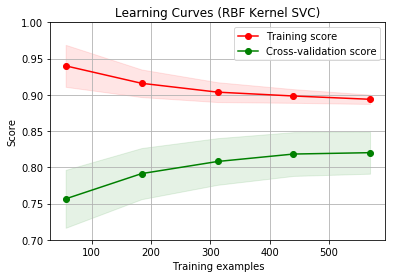

In [37]:
title = "Learning Curves (RBF Kernel SVC)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(model, title, X_train, y_train, ylim=(0.7, 1.0), cv=cv, n_jobs=-1);

Again, overfitting. Let's try Random Forests next.